# Capstone 1 - Part 1

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1LfquyGkEO45x35q8yvYzke8lswCfBu89/view?usp=sharing)
 
### Context & Problem statement:

This is a fictional data set that contains atmost 30 features of categorical and discreet data. These data are kind of both numerical and text values which help in analysing the employee data from hiring to firing and on boarding to attrition.  Dive into current available HR metrics to reduce the attrition rate and improve employee performance. Employee attrition has long been a significant worry for organizations due to the substantial investments of time, money, and effort in training new employees. When an employee departs, it results in overall losses for the company, including the cost of replacing and retraining, as well as disruptions in workflow. Moreover, attrition can erode trust among remaining employees, creating additional management challenges.

The HR Attrition dataset, albeit fictional, serves the purpose of identifying key factors that could play a pivotal role in determining which employees are more likely to leave the company and who is likely to stay. In this capstone, we delve into a thorough analysis of these influential factors and employ predictive modeling techniques to gain a deeper understanding, ultimately enabling us to make accurate predictions regarding employee attrition.

### Business use case:

- Brief overview of attrition within the organization
- Explore the main factors that lead to employee attrition
- Propose relevant contributors to Performance Ratings and calculate their correlations

### Goals/ Metrics:

- Identify top reasons for attrition and recommend further action steps to improve
- Point out key factors that drive employee performance

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features, and target variable (attrition)
- Understanding the context and significance of each feature in relation to employee attrition

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables (e.g., employee tenure, performance scores) and do Exploratory Data Analysis (EDA)
- Analyzing factors contributing to employee attrition (e.g., age, job role, salary, work environment)
- Visualizing attrition rates across different demographic and employment-related variables
- Identifying correlations and patterns in the data to understand attrition drivers
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [1]:
# We will use Python with libraries such as Pandas, NumPy, and Matplotlib. First we Extract data and understand the dataset.

### 1. Data Retrieval and Exploration

import pandas as pd

# Step-1 : Loading the dataset
file_path = 'HR-Analytics.csv'
df = pd.read_csv(file_path)

# Step -2 : Display the first 5 rows to get an estimate on how it looks
df_sample = df.head(5)
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [2]:
# Next Step -3 : Display the columns of the dataset for reference
print("\nColumns in the dataset:")
print(df_sample.columns)

# Step -4 : Display basic information about the dataset
print("\nBasic Information about the dataset:")
print(df_sample.info())

# Step -5 : Display summary statistics of numerical features
print("\nSummary Statistics:")
print(df_sample.describe(include='all'))


Columns in the dataset:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age         

In [4]:
### 2. Understanding the Features and Target Variable

# Checking for missing values
missing_values = df.isnull().sum()

# Removing duplicates
data = df.drop_duplicates()

# Handling missing values 
data.fillna(method='ffill', inplace=True)  # Forward fill example

# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Checking the data types and converting as necessary
data_encoded.dtypes

# Feature Engineering: Creating a new variable 'Tenure'
df['Tenure'] = df['YearsAtCompany'] - df['YearsInCurrentRole'] - df['YearsSinceLastPromotion']

'''
# Create new feature: Employee tenure
df['Tenure'] = df['YearsAtCompany'] + df['YearsSinceLastPromotion']
'''

# Display the new features
df[['Tenure']].head()

# The target variable in our dataset is `Attrition`, which indicates whether an employee has left the company (`Yes` or `No`).
# Checking how we can further explore the features and their relevance:


# Step -1 : Check the unique values in 'Attrition' to understand the target variable
print("\nUnique values in 'Attrition':")
print(df_sample['Attrition'].unique())

# Step -2 : Analyze the distribution of the target variable
print("\nAttrition distribution:")
print(df_sample['Attrition'].value_counts())


Unique values in 'Attrition':
['Yes' 'No']

Attrition distribution:
No     3
Yes    2
Name: Attrition, dtype: int64


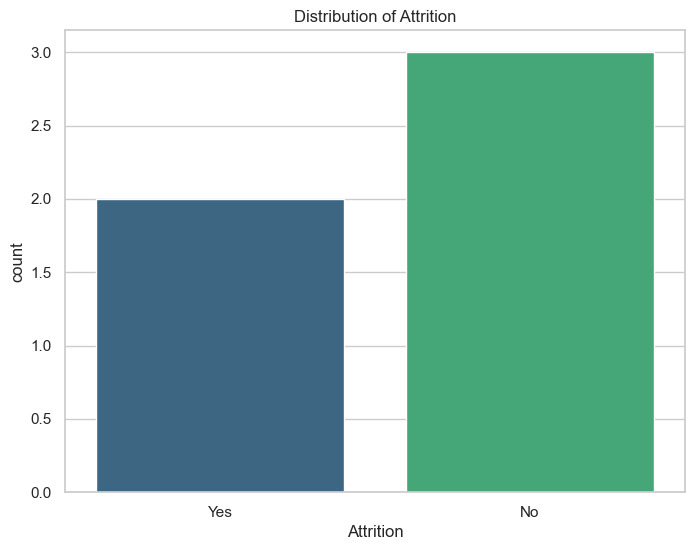

In [5]:
### 3. Visualizing the Data

# Using Matplotlib to create visualizations to understand the dataset:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Distribution of 'Attrition':

plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df_sample, palette='viridis')
plt.title('Distribution of Attrition')
plt.show()


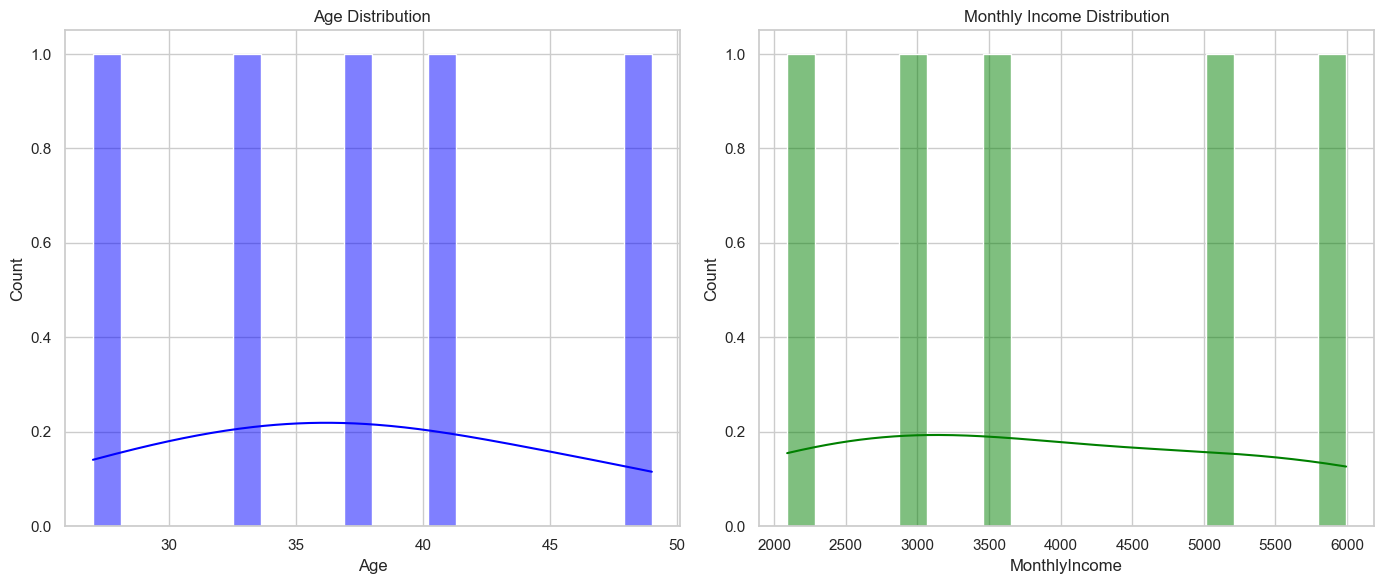

In [6]:
# Distribution of numerical features such as Age and MonthlyIncome:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_sample['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_sample['MonthlyIncome'], bins=20, kde=True, color='green')
plt.title('Monthly Income Distribution')

plt.tight_layout()
plt.show()

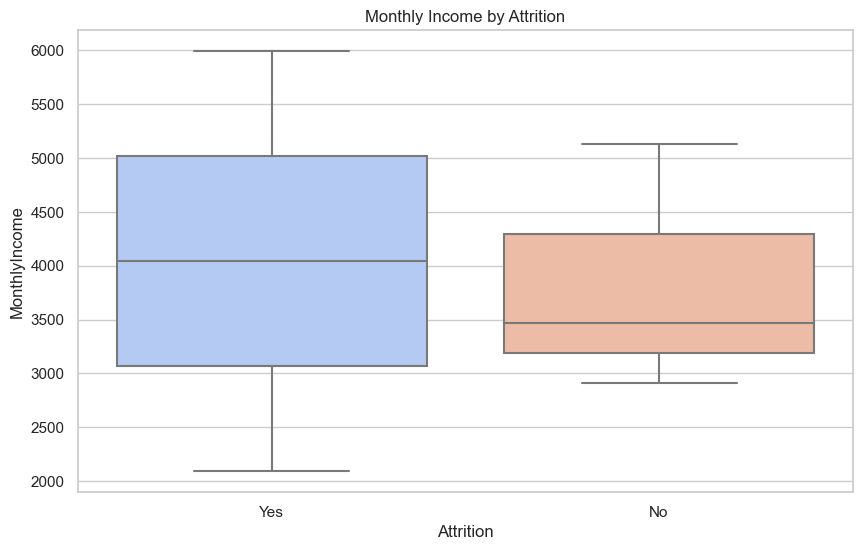

In [7]:
# Boxplot of MonthlyIncome by Attrition:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_sample, palette='coolwarm')
plt.title('Monthly Income by Attrition')
plt.show()

In [8]:
###Other way to tackle the project on employee attrition, where we are following a structured approach:

## 1. Data Retrieval

import pandas as pd

# Loading the dataset from a CSV file
file_path = 'HR-Analytics.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()

### Notes for Project Reference :

'''Part -1: Extracting the dataset : The dataset is loaded using pandas' `read_csv` method.
   Next we are Exploring the dataset : Use `head()` to quickly inspect the initial rows and get a sense of the structure.
   And then Understanding features : Check the columns to understand what data is available, 
   such as employee details and attrition status.
'''


"Part -1: Extracting the dataset : The dataset is loaded using pandas' `read_csv` method.\n   Next we are Exploring the dataset : Use `head()` to quickly inspect the initial rows and get a sense of the structure.\n   And then Understanding features : Check the columns to understand what data is available, \n   such as employee details and attrition status.\n"

In [9]:
###Part -2: Data Preprocessing


# Checking for missing values
missing_values = data.isnull().sum()

# Removing duplicates
data = data.drop_duplicates()

# Handling missing values 
data.fillna(method='ffill', inplace=True)  # Forward fill example

# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Checking the data types and converting as necessary
data_encoded.dtypes


### Notes for Project Reference :

'''Part -2: Cleaning the dataset: Handle missing values with `fillna()`, and remove duplicates with `drop_duplicates()`.
   Encoding categorical variables: Use `pd.get_dummies()` to convert categorical variables into numerical values.
   Data types: Ensure all data types are suitable for analysis, converting as needed.
'''


'Part -2: Cleaning the dataset: Handle missing values with `fillna()`, and remove duplicates with `drop_duplicates()`.\n   Encoding categorical variables: Use `pd.get_dummies()` to convert categorical variables into numerical values.\n   Data types: Ensure all data types are suitable for analysis, converting as needed.\n'

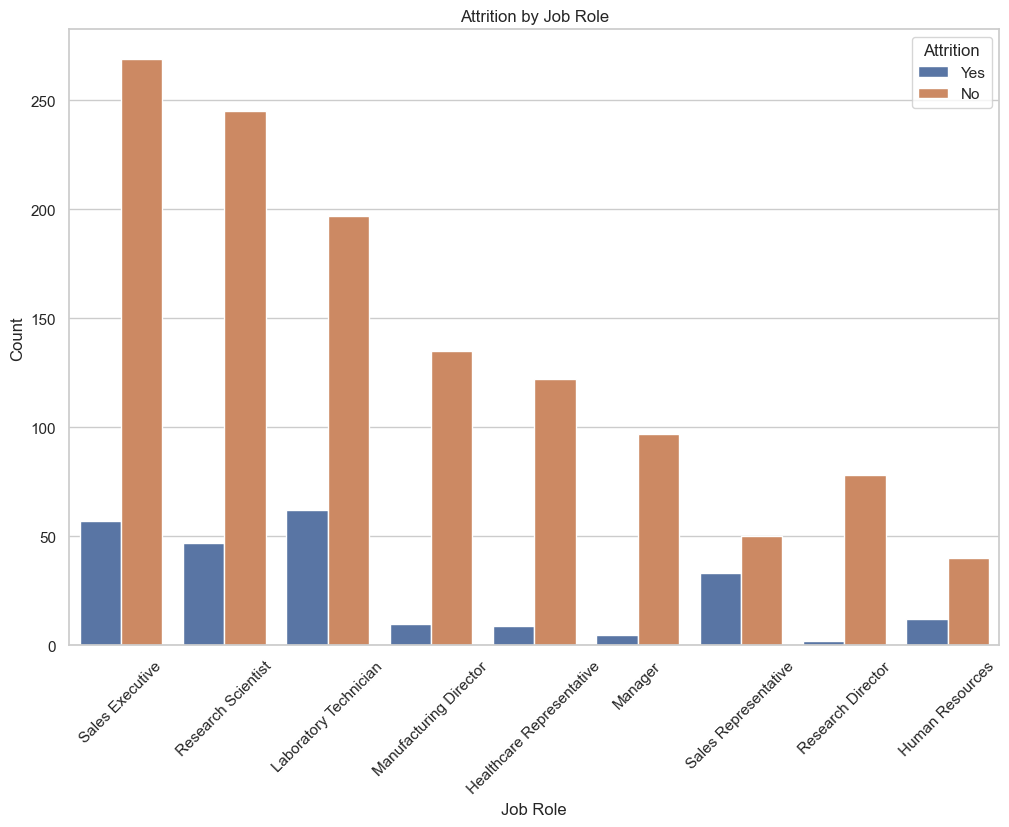

In [10]:
###Part -3 : Feature Engineering & EDA

# Feature Engineering: Creating a new variable 'Tenure'
df['Tenure'] = df['YearsAtCompany'] - df['YearsInCurrentRole'] - df['YearsSinceLastPromotion']

'''
# Create new feature: Employee tenure
df['Tenure'] = df['YearsAtCompany'] + df['YearsSinceLastPromotion']
'''

# Display the new features
df[['Tenure']].head()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Attrition by job role:

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.title('Attrition by Job Role')
plt.show()


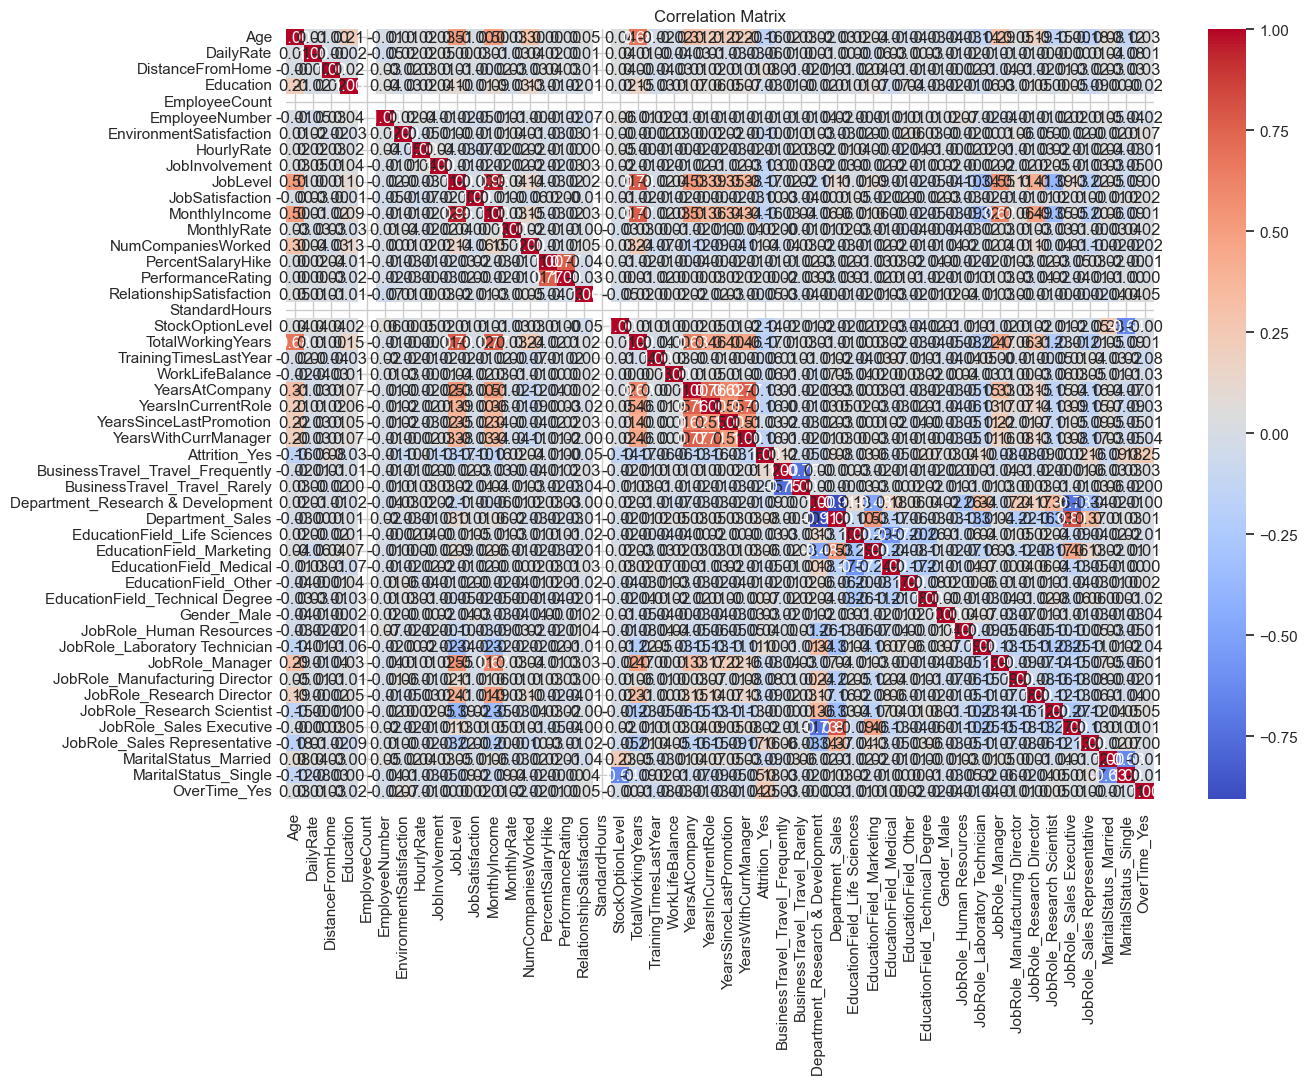

In [11]:
# Correlation matrix (by ChatGPT):

plt.figure(figsize=(14, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


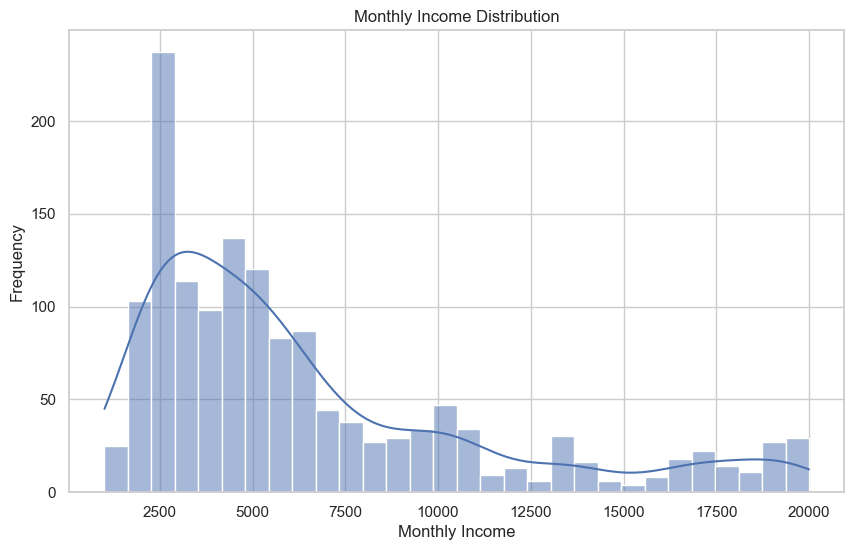

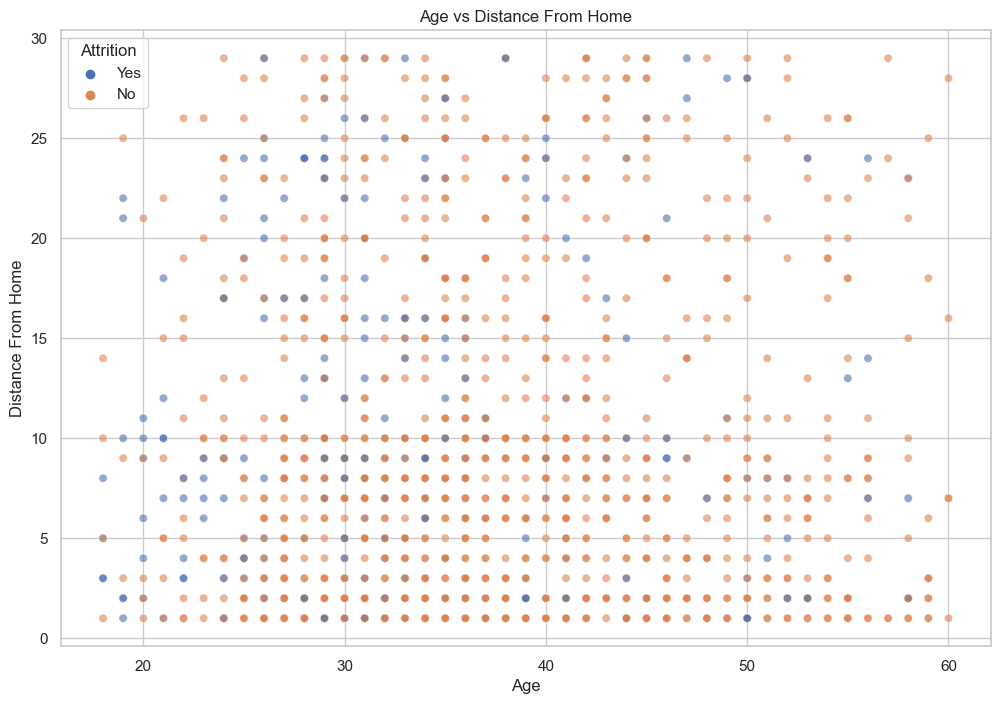

"Part -3 :Feature Engineering: Created a new feature `Tenure` to reflect employee's tenure in their current role.\n   EDA: Analyzed distributions and relationships in the data.\n   Age Distribution: Compared age distributions between attrition and non-attrition.\n   Job Role: Investigated how different job roles affect attrition rates.\n   Correlation Matrix: Assessed correlations between features to identify significant relationships.\n   1D Exploration: Visualized monthly income distribution.\n   2D Exploration: Examined the relationship between age and distance from home, colored by attrition status.\n"

In [12]:
# 1D and 2D Explorations:

### Example of 1D exploration: 
# Salary distribution:

plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyIncome'], bins=30, kde=True)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Monthly Income Distribution')
plt.show()

### Example of 2D exploration: 
# Age vs. DistanceFromHome:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Age', y='DistanceFromHome', hue='Attrition', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Distance From Home')
plt.title('Age vs Distance From Home')
plt.show()

### Notes for Project Reference :

'''Part -3 :Feature Engineering: Created a new feature `Tenure` to reflect employee's tenure in their current role.
   EDA: Analyzed distributions and relationships in the data.
   Age Distribution: Compared age distributions between attrition and non-attrition.
   Job Role: Investigated how different job roles affect attrition rates.
   Correlation Matrix: Assessed correlations between features to identify significant relationships.
   1D Exploration: Visualized monthly income distribution.
   2D Exploration: Examined the relationship between age and distance from home, colored by attrition status.
'''


In [ ]:
### 4. Effective Communication


### Starting Cells:

'''We first began by extracting the dataset from the provided CSV file and inspected its initial structure. 
   The dataset includes various features related to employee demographics and employment status,
   which are crucial for understanding factors influencing employee attrition.
'''

### Data Preprocessing:

'''We have handled missing values by using forward fill, removed any duplicate rows, 
   and encoded categorical variables to make the dataset suitable for analysis. 
   These preprocessing steps are essential to ensure the quality and integrity of the data.
'''

### Feature Engineering & EDA:

'''
We have created a new feature `Tenure` to capture the difference between total years at the company and years with Current Manager. 
With this, we can provide insights into employee experience.

For exploratory data analysis, we use:

- Age Distribution: We compared age distributions between employees who left and those who stayed.
This helps in understanding if age is a significant factor in attrition.
- Job Role: The count plot shows attrition rates across different job roles, 
helping identify which roles are more prone to attrition.
- Correlation Matrix: The heatmap of correlations provides insights into how different features are related, 
which can indicate potential drivers of attrition.
- 1D Exploration: Monthly income distribution was visualized to understand its spread.
- 2D Exploration: We plotted age against distance from home to explore any potential patterns related to attrition.
'''


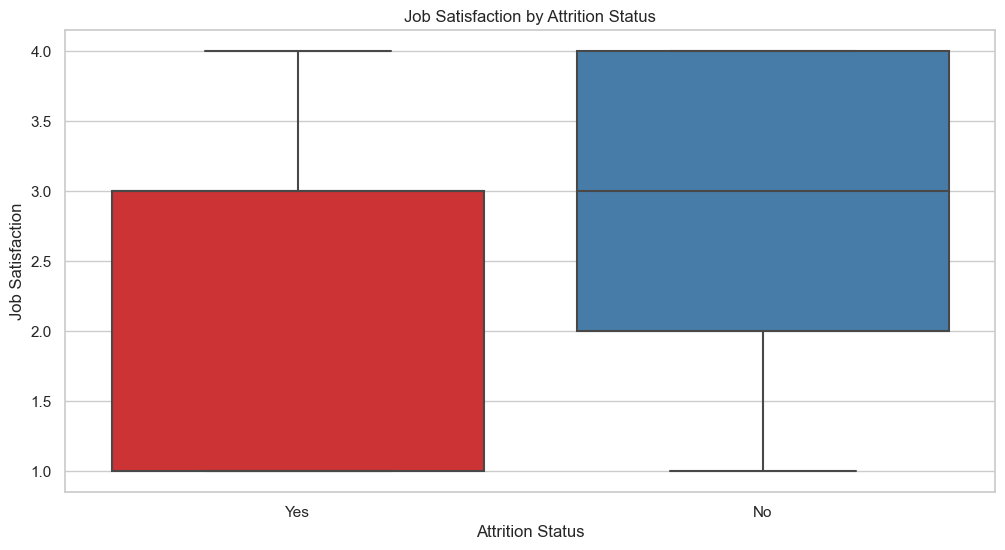

'\nExplanation:\n- Purpose: This box plot visualizes the distribution of job satisfaction scores by attrition status.\n- Insight: It helps to determine if job satisfaction levels differ significantly between employees who leave and those who stay.\n'

In [13]:
#### Plot 5: Employee Satisfaction vs. Attrition:


plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition', y='JobSatisfaction', palette='Set1')
plt.xlabel('Attrition Status')
plt.ylabel('Job Satisfaction')
plt.title('Job Satisfaction by Attrition Status')
plt.show()

'''
Explanation:
- Purpose: This box plot visualizes the distribution of job satisfaction scores by attrition status.
- Insight: It helps to determine if job satisfaction levels differ significantly between employees who leave and those who stay.
'''

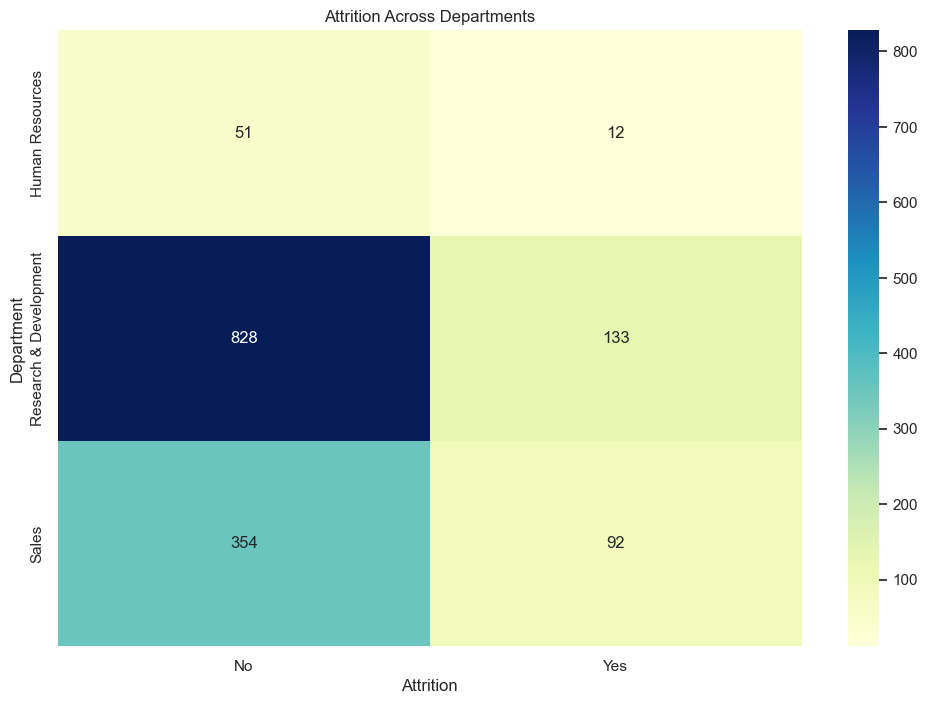

'\nExplanation:\n- Purpose: This heatmap shows the number of employees who left and stayed across different departments.\n- Insight: It helps identify departments with high attrition rates and provides insights into departmental attrition patterns.\n'

In [14]:
#### Plot 6: Heatmap of Attrition Across Departments:


plt.figure(figsize=(12, 8))
department_attrition = pd.crosstab(data['Department'], data['Attrition'])
sns.heatmap(department_attrition, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Attrition')
plt.ylabel('Department')
plt.title('Attrition Across Departments')
plt.show()

'''
Explanation:
- Purpose: This heatmap shows the number of employees who left and stayed across different departments.
- Insight: It helps identify departments with high attrition rates and provides insights into departmental attrition patterns.
'''

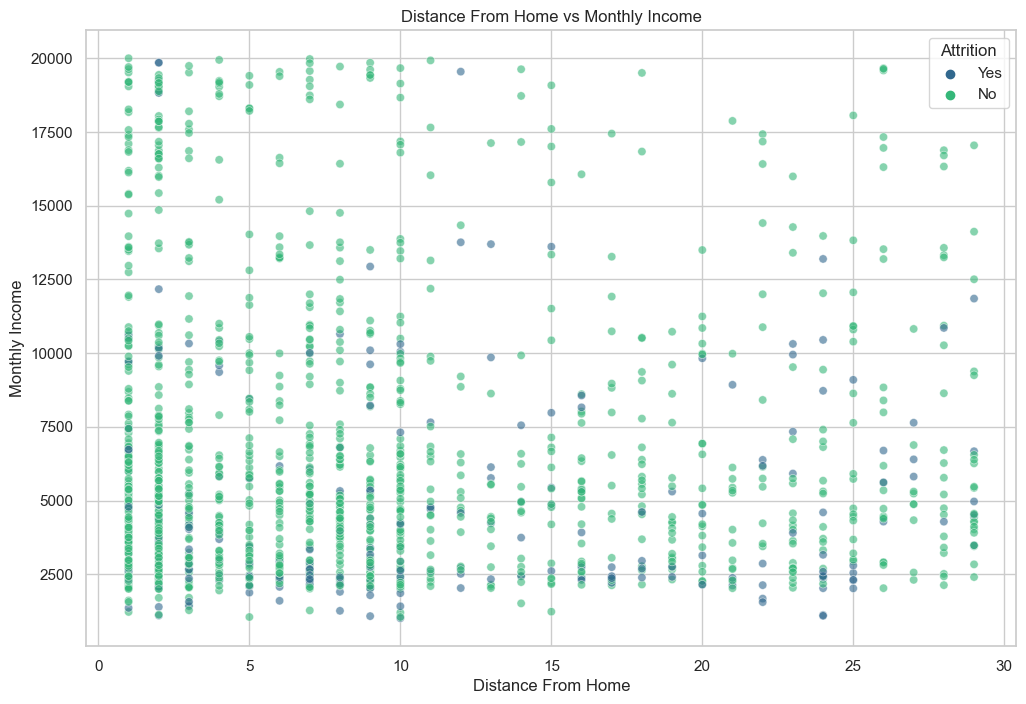

"\nExplanation:\n- Purpose: This scatter plot explores the relationship between distance from home and monthly income, with points colored by attrition status.\n- Insight: It may reveal if there's any pattern linking income and distance with attrition.\n"

In [15]:
#### Plot 7: Distance from Home vs. Monthly Income Scatter Plot:


plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='DistanceFromHome', y='MonthlyIncome', hue='Attrition', alpha=0.6, palette='viridis')
plt.xlabel('Distance From Home')
plt.ylabel('Monthly Income')
plt.title('Distance From Home vs Monthly Income')
plt.show()

'''
Explanation:
- Purpose: This scatter plot explores the relationship between distance from home and monthly income, with points colored by attrition status.
- Insight: It may reveal if there's any pattern linking income and distance with attrition.
'''



### 4. Effective Communication for Plots and Reports:

# Visualizations and Insights:

#### Age Distribution by Attrition Status

'''
The histogram compares the age distribution of employees who left the company with those who stayed. 
It highlights the age groups most affected by attrition, which can inform targeted retention strategies.
'''

#### Attrition by Job Role

'''
This count plot reveals the number of employees who left versus those who stayed across various job roles. 
It identifies roles with high attrition rates, suggesting areas for focused managerial attention.
'''

#### Correlation Matrix

'''
The heatmap of the correlation matrix shows relationships between numerical features. 
Strong correlations may indicate factors that significantly influence attrition, 
helping to prioritize feature selection for predictive modeling.
'''

#### Monthly Income Distribution

'''
This plot provides an overview of income distribution among employees.
It is useful for understanding how salary ranges might correlate with attrition, 
with a focus on income brackets that are more or less likely to leave.
'''

#### Age vs. Distance from Home

'''
The scatter plot illustrates how age relates to distance from home,
with coloring indicating attrition status. 
This helps explore if longer commutes or age impacts employee retention.
'''

#### Job Satisfaction by Attrition Status
'''
The box plot shows job satisfaction levels segmented by attrition status. 
Differences in satisfaction scores between those who left and those who stayed can inform employee engagement strategies.
'''

#### Attrition Across Departments

'''
The heatmap of attrition across departments highlights departments with higher attrition rates.
This information can direct HR interventions to reduce turnover in specific areas.
'''

#### Distance from Home vs. Monthly Income

'''
The scatter plot examines the relationship between distance from home and monthly income, 
with attrition status as a color indicator. It helps in understanding how these variables interact,
and their potential influence on employee turnover.


This comprehensive approach to visualizing and interpreting data should provide valuable insights into the factors,
affecting employee attrition and help in making data-driven decisions.
'''

<module 'matplotlib.pyplot' from 'C:\\Users\\kumar\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

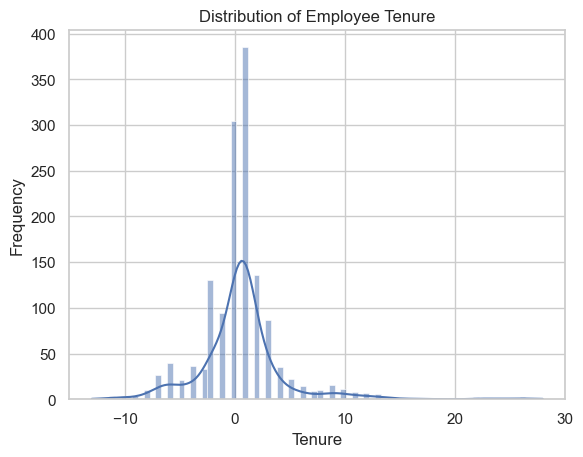

In [16]:
# 1-D Exploration: Distribution of Tenure
sns.histplot(df['Tenure'], kde=True)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt

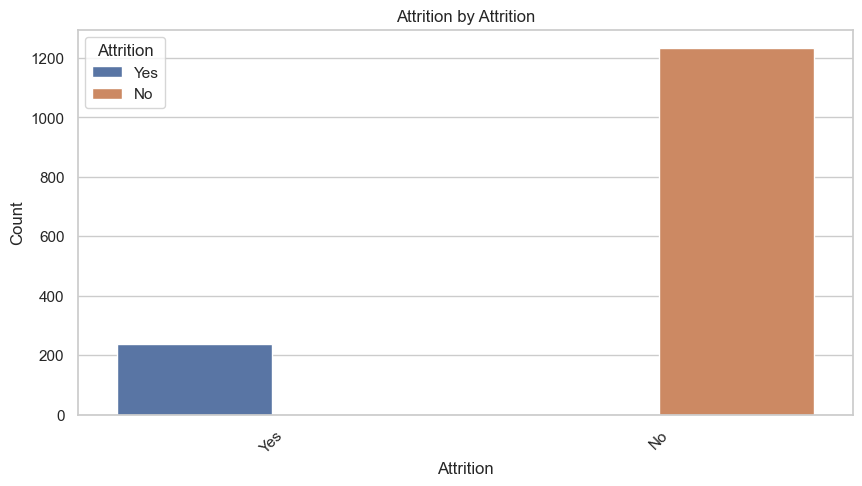

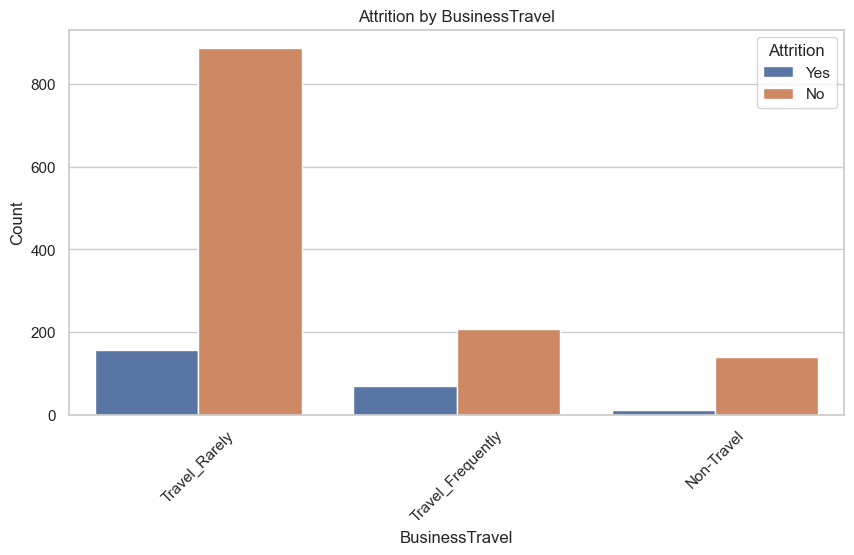

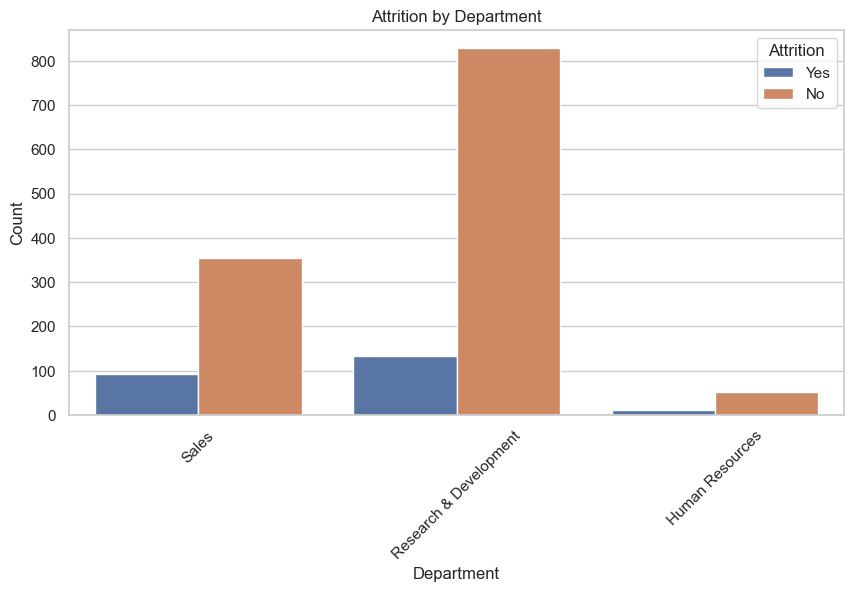

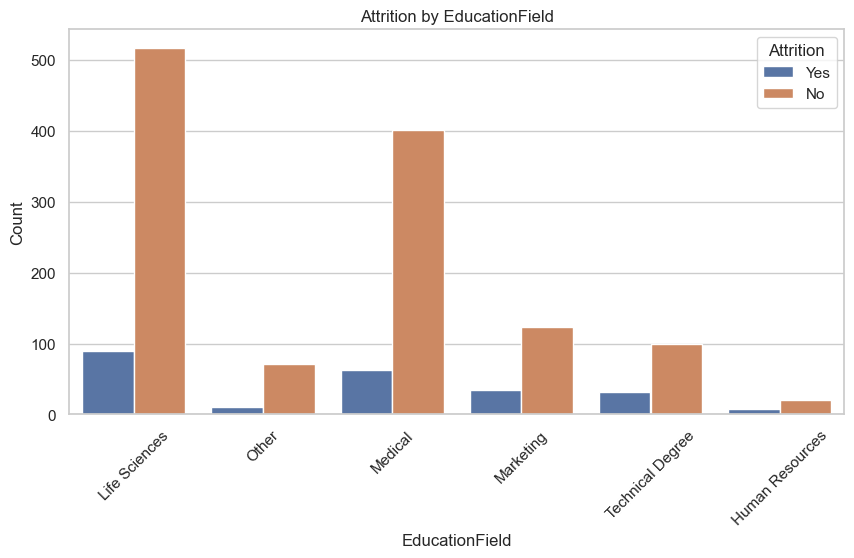

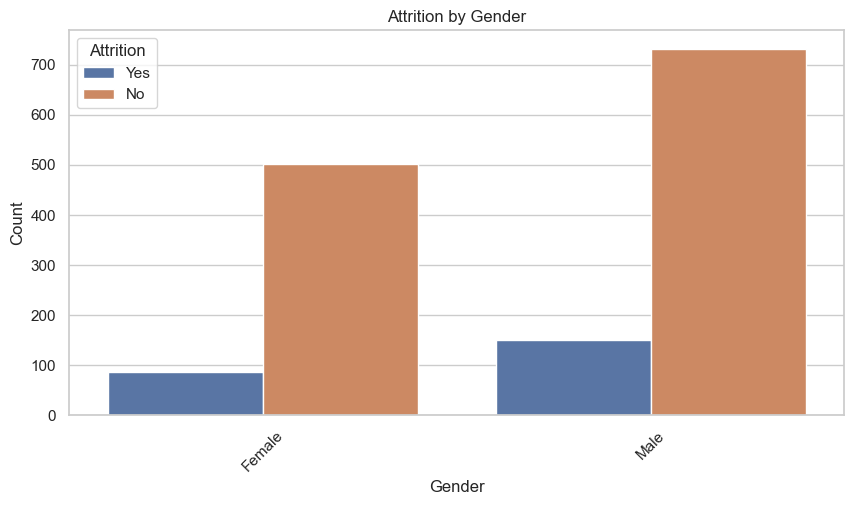

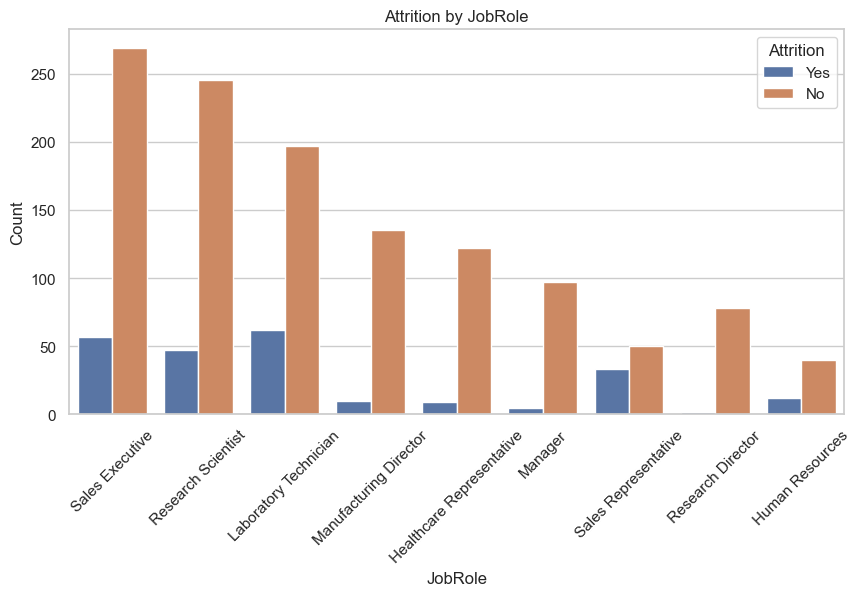

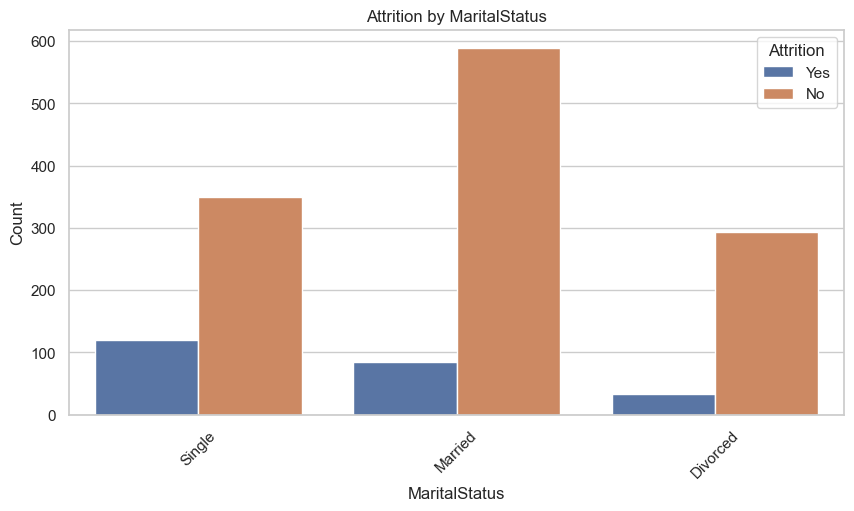

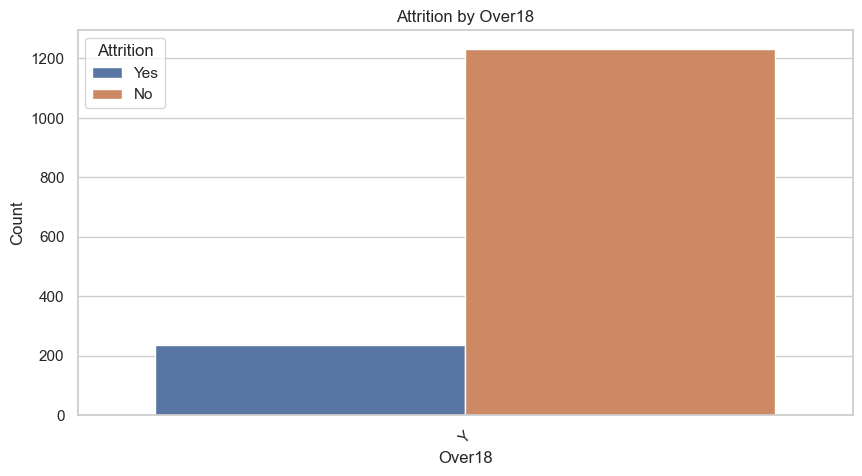

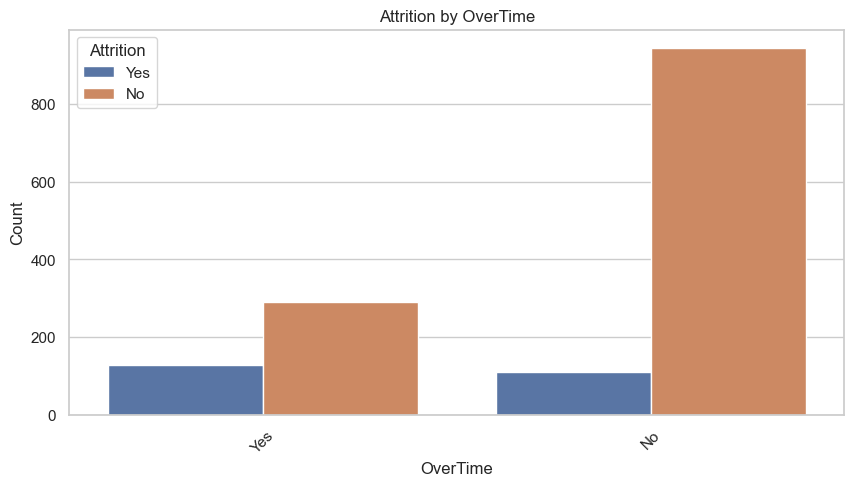

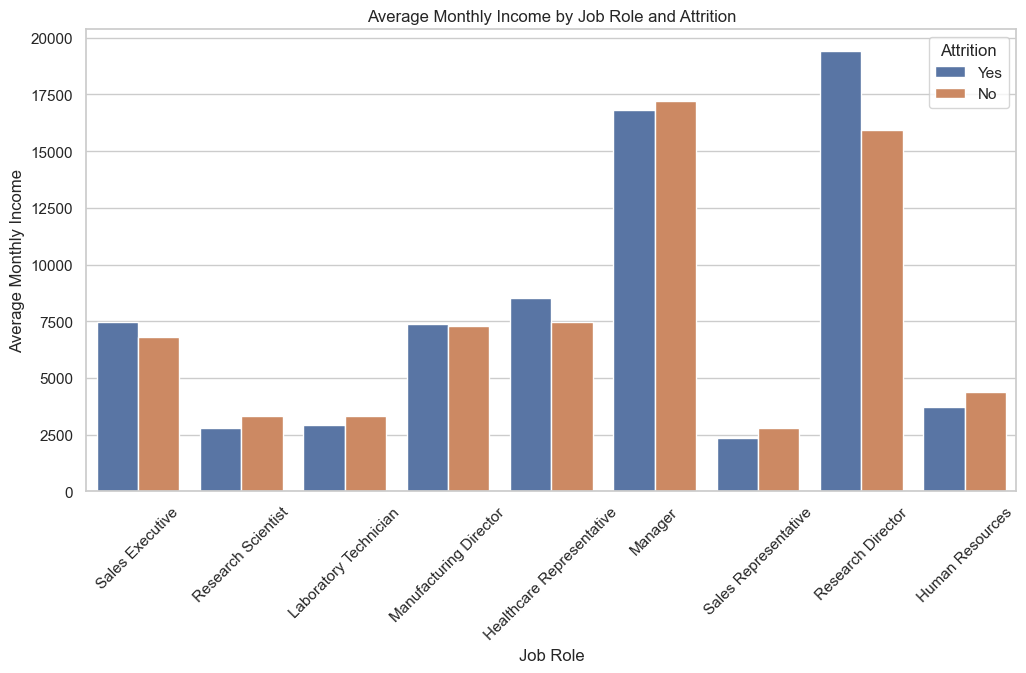

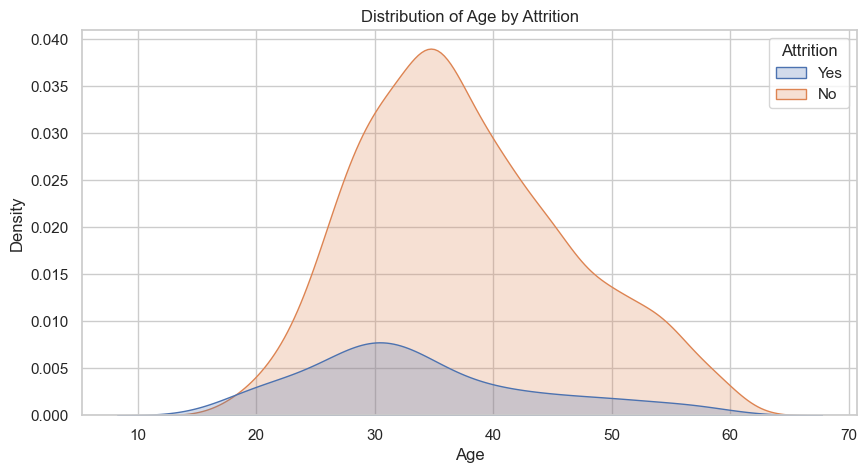

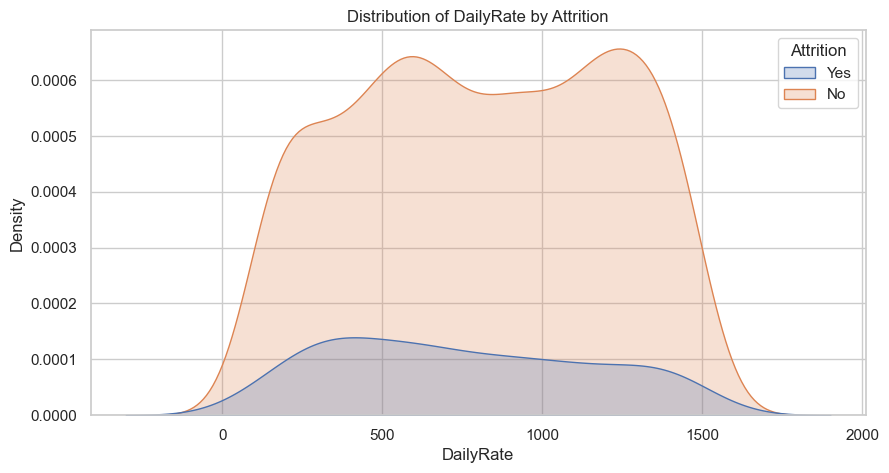

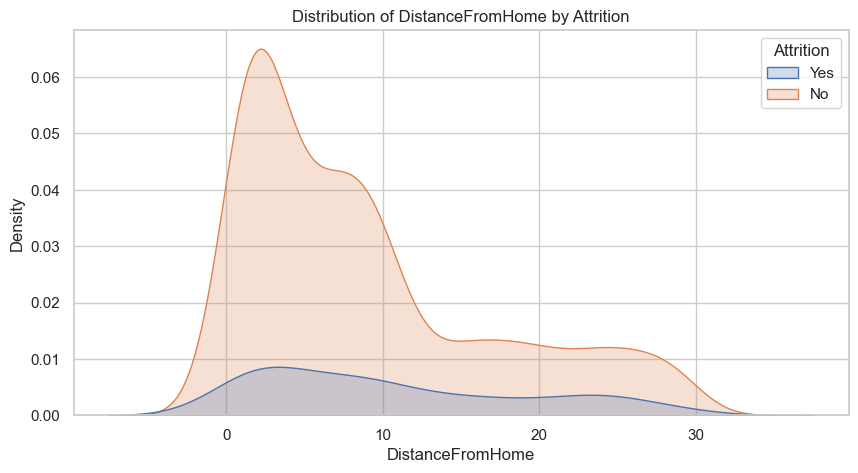

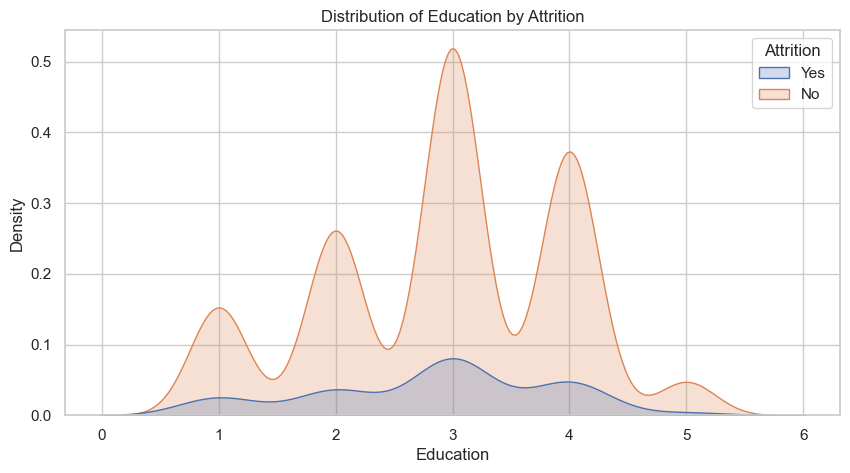

Skipping KDE plot for EmployeeCount due to zero variance.


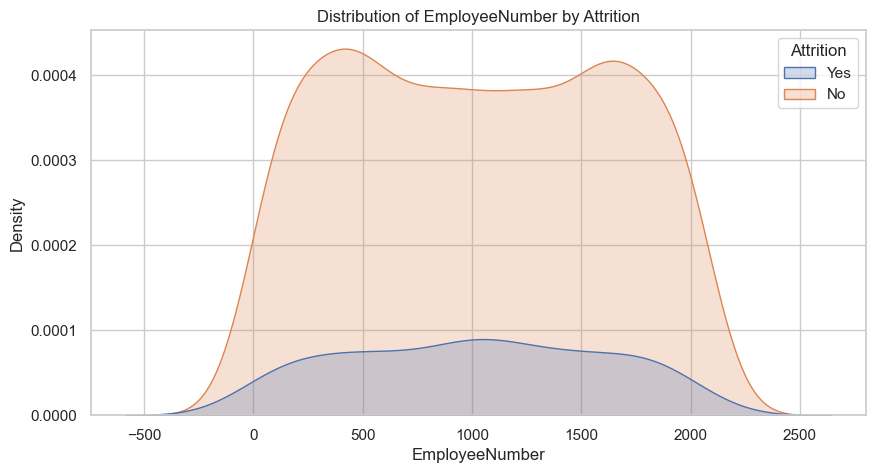

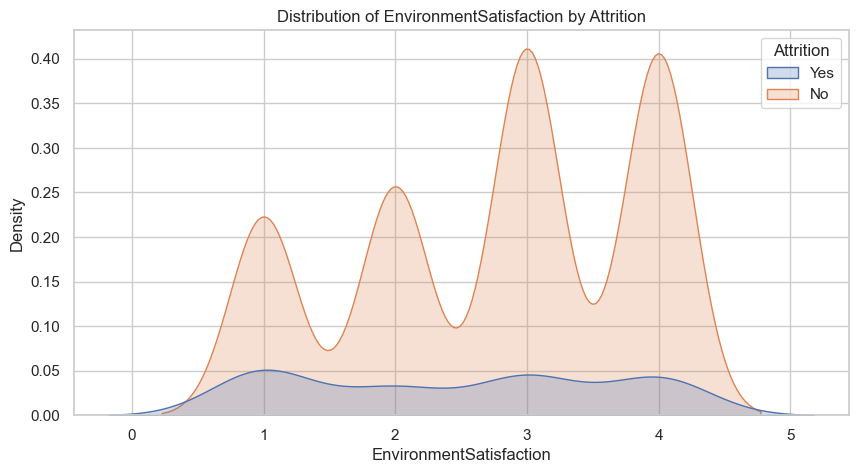

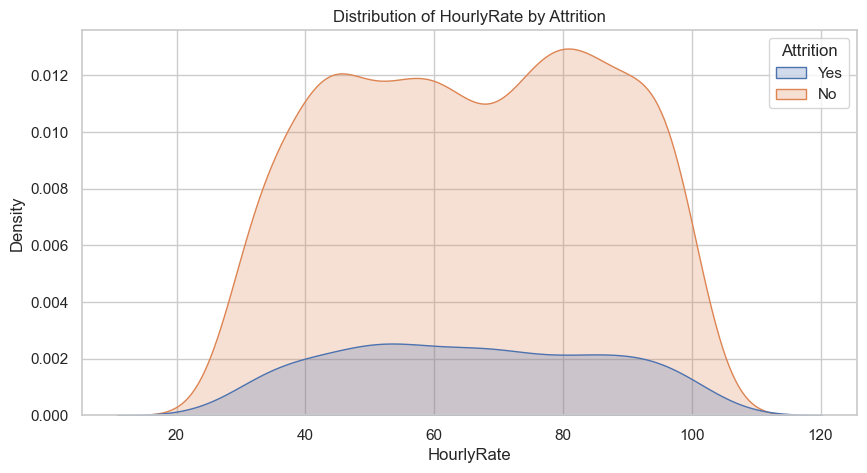

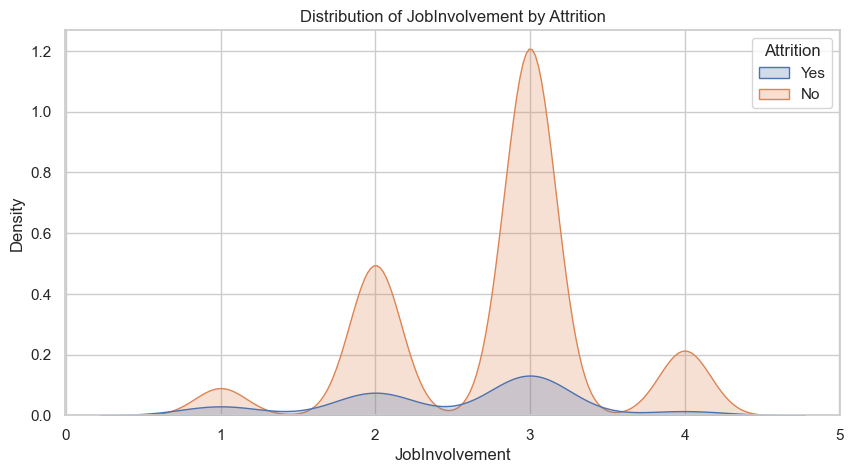

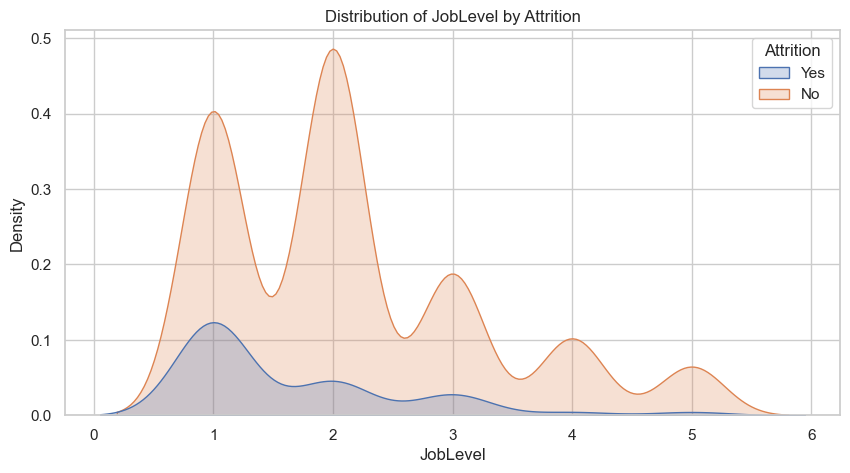

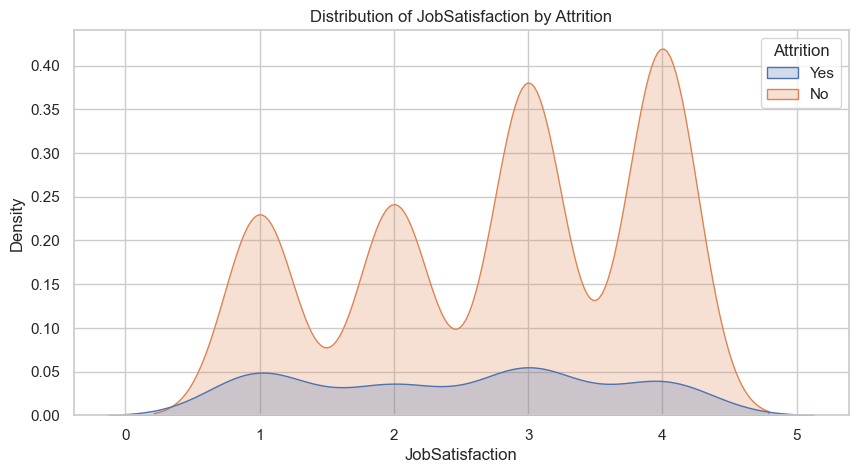

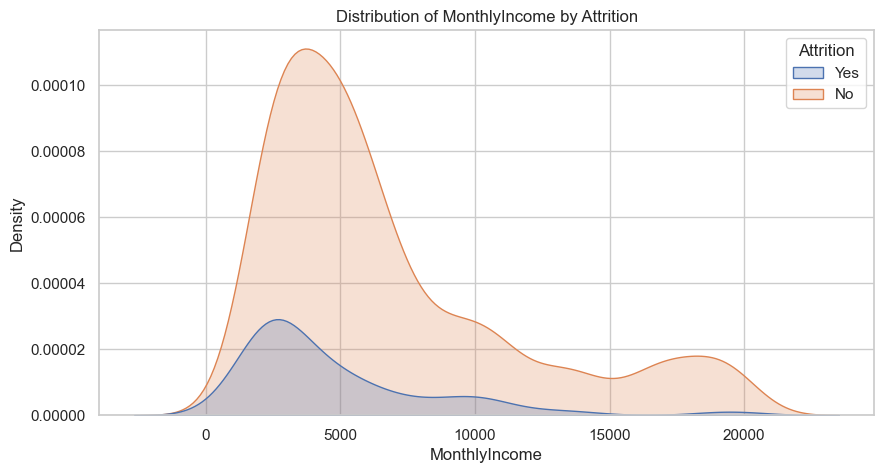

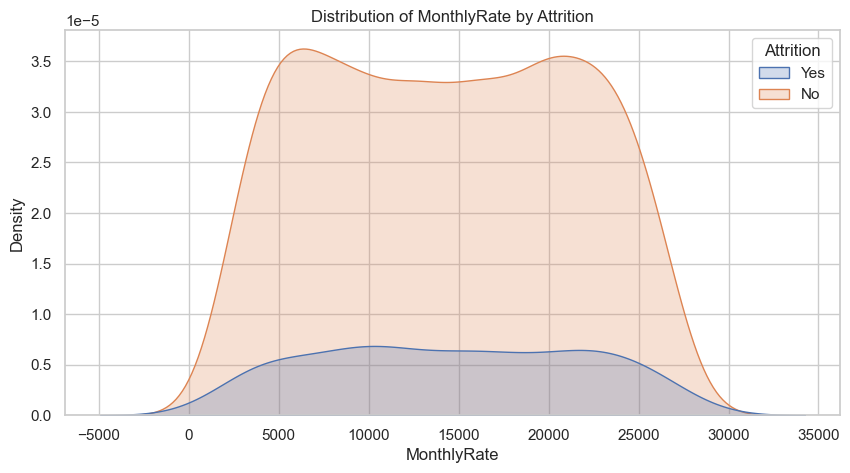

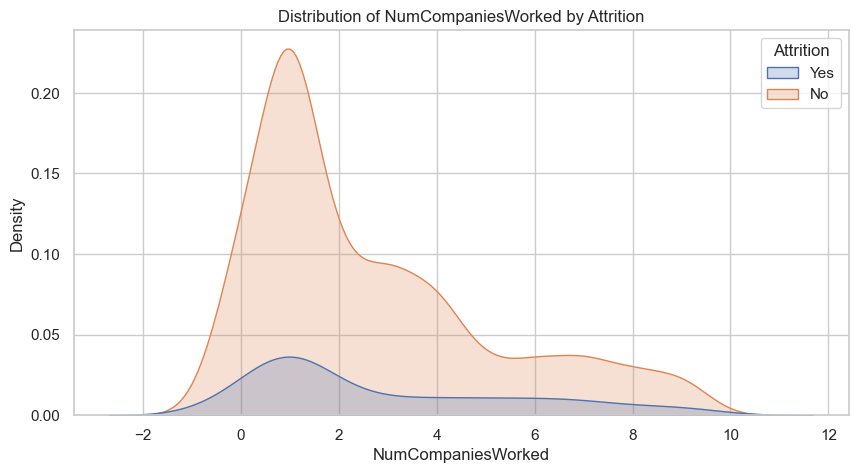

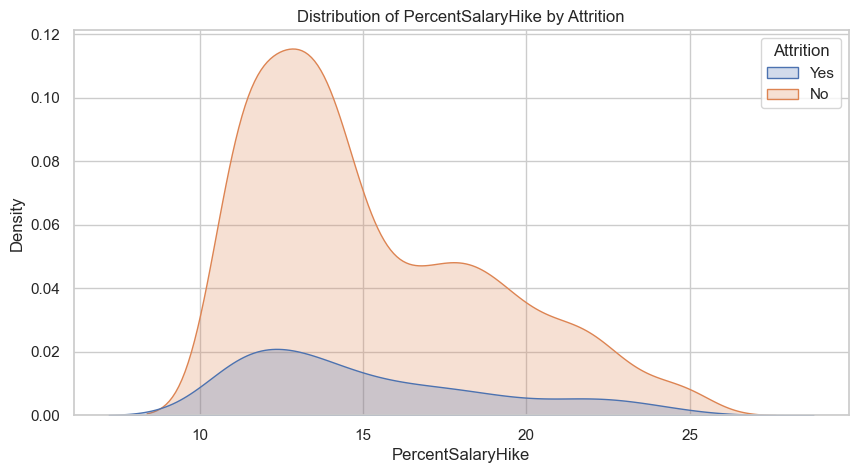

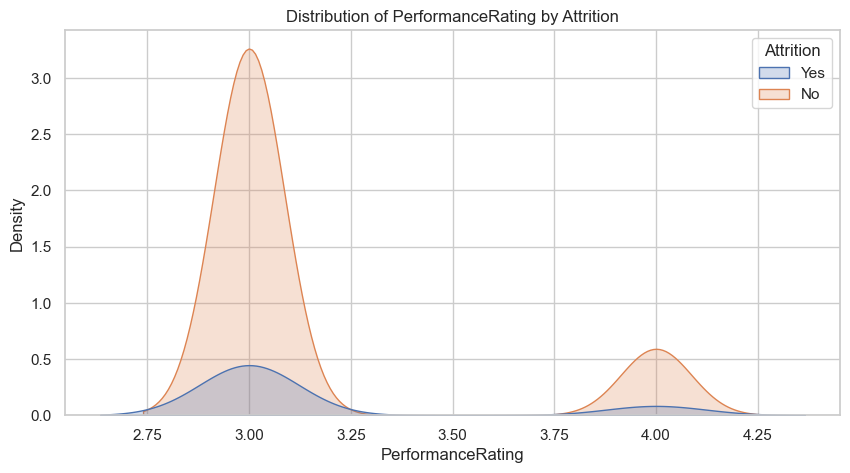

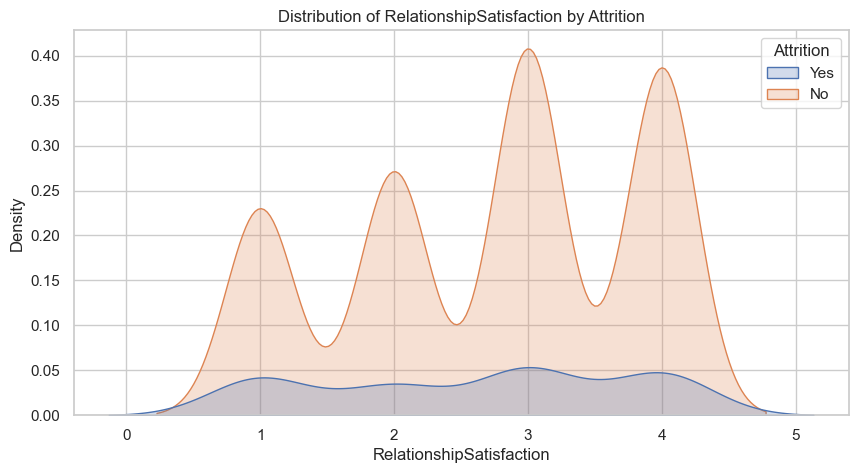

Skipping KDE plot for StandardHours due to zero variance.


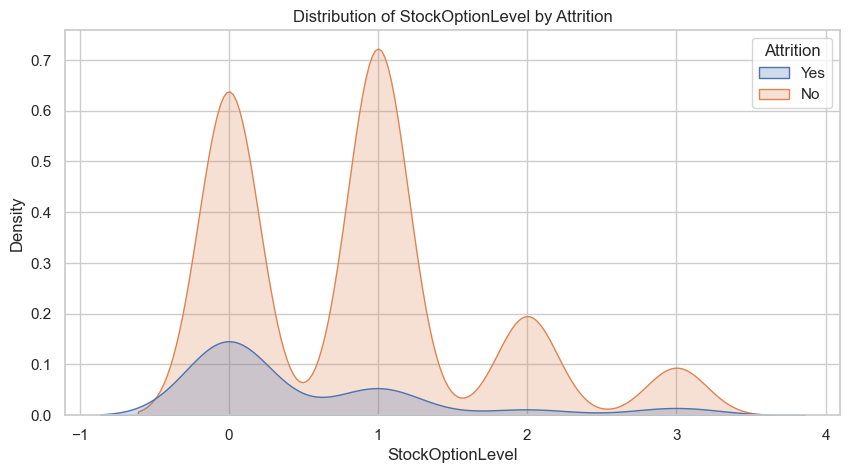

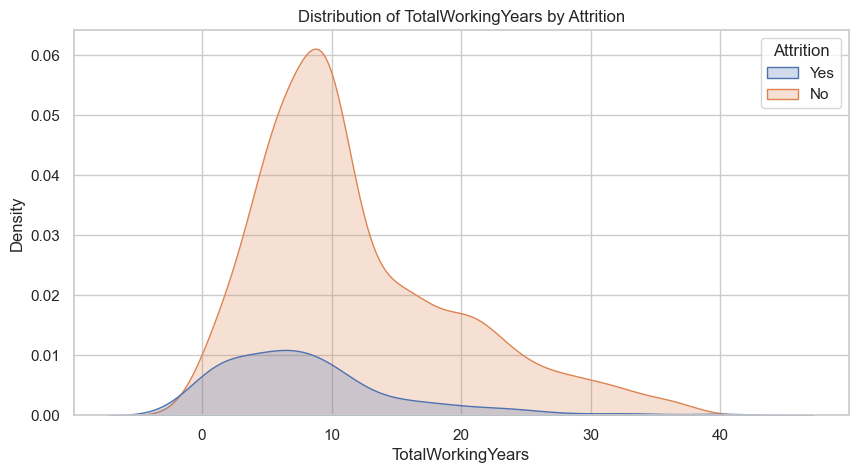

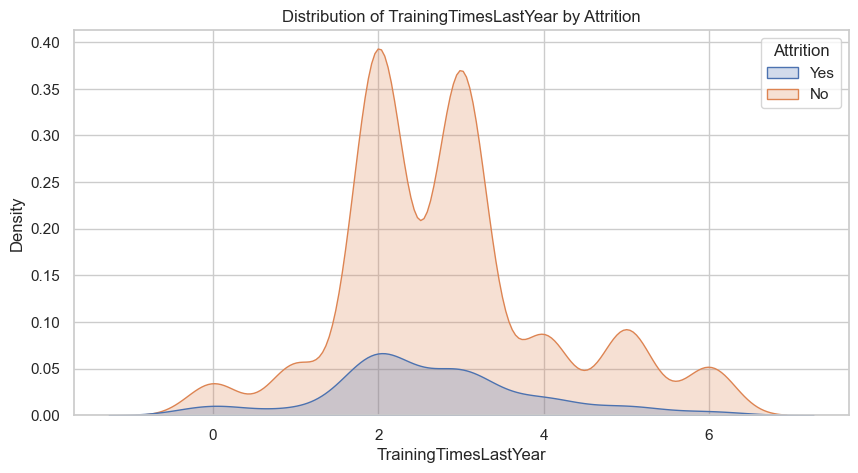

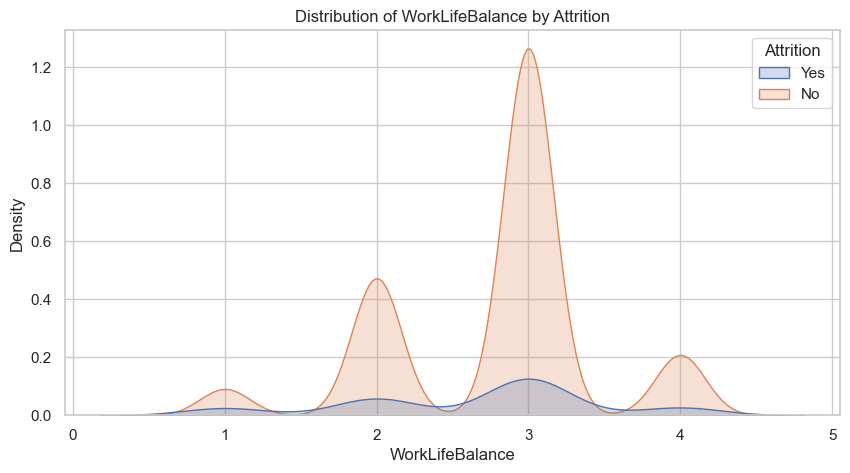

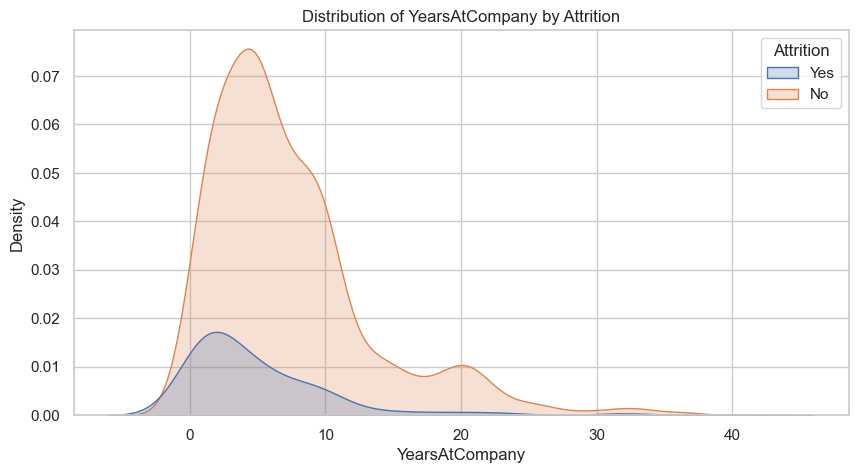

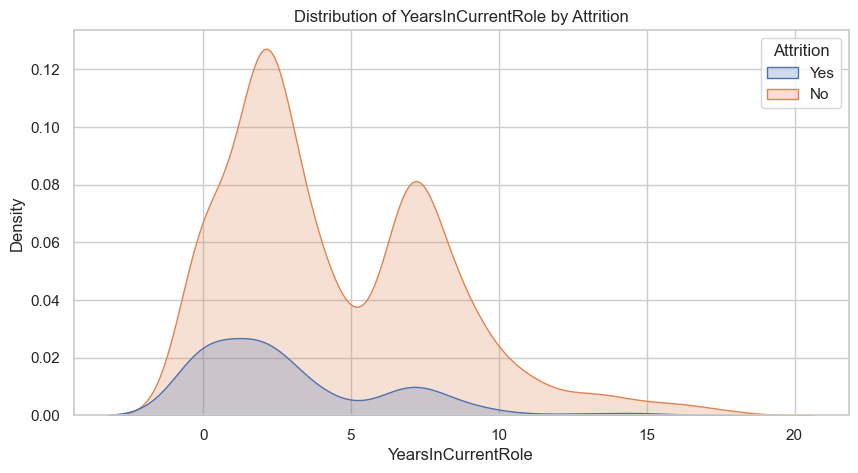

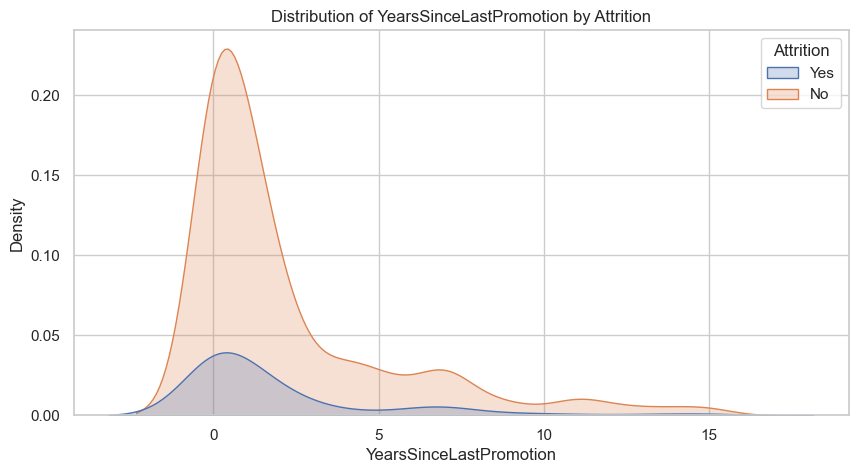

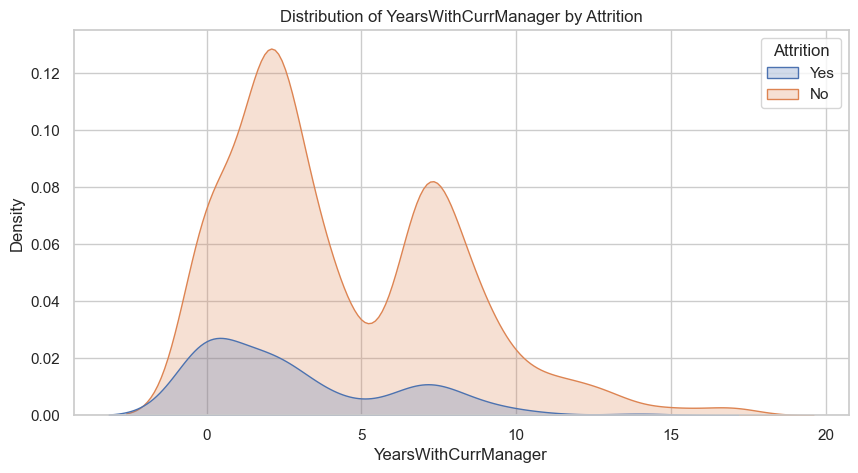

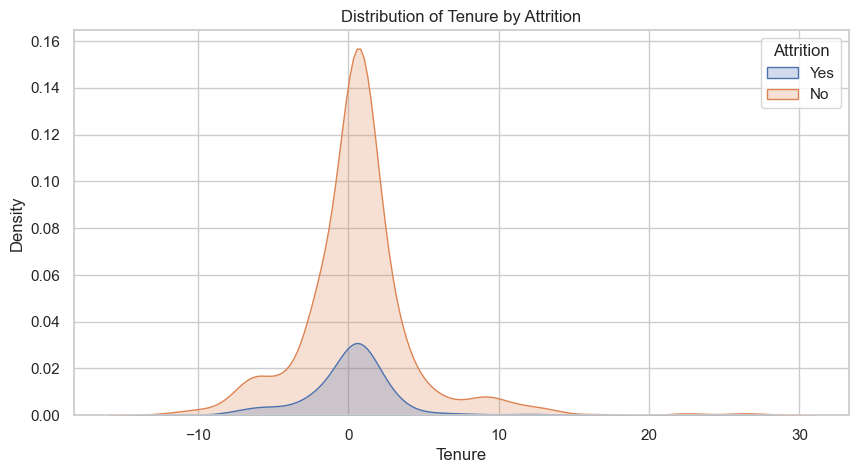

In [20]:
### Other Plots which I missed were Generated by ChatGPT below:

import numpy as np

# 5. Attrition Rate by Categorical Features
categorical_features = df.select_dtypes(include=[object]).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Attrition', data=df)
    plt.title(f'Attrition by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 6. Barplot of Average Monthly Income by Job Role (example of categorical vs numeric analysis)
plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, errorbar=None) # errorbar=None instead of ci = None to rmv error
plt.title('Average Monthly Income by Job Role and Attrition')
plt.xlabel('Job Role')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.show()



# 8. KDE Plots for Continuous Variables by Attrition

# List of numerical features to plot
numerical_features = df.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    if df[feature].var() == 0:  # Check for zero variance
        print(f"Skipping KDE plot for {feature} due to zero variance.")
        continue
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=feature, hue='Attrition', fill=True, warn_singular=False)
    plt.title(f'Distribution of {feature} by Attrition')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


### Detailed Report Based on KDE Graphs and Bar Plots


#### 1. Introduction

In this analysis, we aim to understand employee attrition patterns by exploring various categorical and continuous variables in the dataset. This exploration is essential to identify factors that contribute to employee turnover and to provide actionable insights for HR management.


#### 2. Attrition Rate by Categorical Features

- Purpose: To examine how different categorical features such as `JobRole`, `Department`, `EducationField`, and others are associated with employee attrition.

- Methodology: 
  - We utilized `sns.countplot` to visualize the count of employees in each category, split by their attrition status (`Attrition` = Yes/No).
  - This analysis helps in identifying categories where attrition is more prevalent.

- Key Observations:
  - Some roles may have higher attrition rates compared to others.
  - Department-specific trends can indicate areas where employee retention strategies need strengthening.

- Points to Include in the Project Report:
  - Visual Representation: Include the count plots for key categorical features, emphasizing those with noticeable attrition differences.
  - Interpretation: Discuss how these insights can inform targeted HR interventions. For instance, if `Sales` shows higher attrition, a deeper analysis into job satisfaction and workload in that department might be warranted.

---

#### 3. Average Monthly Income by Job Role and Attrition

- Purpose: To investigate the relationship between an employee's monthly income, their job role, and attrition.

- Methodology: 
  - A bar plot was generated using `sns.barplot` to compare the average monthly income across different job roles, split by attrition status.
  - The analysis highlights whether income disparities contribute to higher turnover in specific roles.

- Key Observations:
  - Significant differences in average income between employees who stayed and those who left might indicate compensation issues.
  - Specific job roles with lower income but higher attrition could be targeted for compensation reviews.

- Points to Include in the Project Report:
  - Visual Representation: Present the bar plot and discuss the income disparity across job roles.
  - Interpretation: Suggest that competitive salary packages could be a strategy to reduce attrition, especially in roles where income is a significant factor.

---

#### 4. KDE Plots for Continuous Variables by Attrition

- Purpose: To understand the distribution of continuous variables (e.g., `Age`, `MonthlyIncome`, `YearsAtCompany`) and how they differ between employees who stayed and those who left.

- Methodology: 
  - Kernel Density Estimation (KDE) plots were used to visualize the probability density of continuous variables, comparing the distribution for employees with and without attrition.
  - Zero variance variables were skipped to avoid plotting issues, ensuring that only meaningful distributions are displayed.

- Key Observations:
  - If distributions overlap significantly, the feature might not be a strong predictor of attrition.
  - Non-overlapping distributions indicate potential predictors of attrition, such as age or tenure.

- Points to Include in the Project Report:
  - Visual Representation: Display the KDE plots for key continuous variables, pointing out where significant differences in distribution exist.
  - Interpretation: Discuss how these features can be used in predictive modeling. For example, if younger employees show higher attrition rates, this might suggest the need for tailored retention strategies for that demographic.

- Handling Warnings:
  - Mention that variables with zero variance were excluded from the KDE plots to maintain the integrity of the visual analysis. This ensures that only variables contributing meaningful insights were included.

---

#### 5. Conclusion

- Summarize how the visual analyses provide a comprehensive overview of the factors influencing employee attrition.
- Highlight how these insights could guide HR policies, focusing on areas like compensation, job satisfaction, and department-specific issues.

---

### Final Notes for the Project Report

- Consistency: Ensure that all plots are well-labeled with titles, axis labels, and legends where applicable.
- Commentary: Provide thoughtful commentary in the markdown cells accompanying the plots, explaining why each step was performed and what the resulting plots reveal.
- Actionable Insights: Emphasize how the findings can be translated into actionable HR strategies to reduce attrition and improve employee retention.

This report should form the basis of your project submission, providing a structured narrative that ties together your data analysis and the implications for HR decision-making.